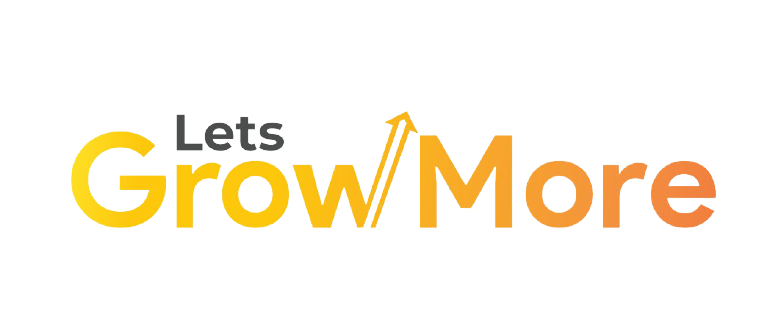

### *VIRTUAL INTERNSHIP PROGRAM*
### *DATA SCIENCE TASK 6*
### Intermediate Level Task
### Prediction using Decision Tree Algorithm

#### Creating  the Decision Tree classifier and visualizing  it graphically.

#### The purpose is that if we feed any new data to this classifier, it would be able to predict the right class accordingly.

### DATASET DESCRIPTION

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. 
One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

#### Attribute Information:

    1)Sepal length in cm

    2)Sepal width in cm

    3)Petal length in cm

    4)Petal width in cm

#### Iris flower can be divided into 3 species as per the length and width of their Sepals and Petals:

    1) Iris Setosa

    2) Iris Versicolour

    3) Iris Virginica
    
    

### IMPORTING LIBRARIES

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from warnings import filterwarnings
filterwarnings(action='ignore')

### LOADING THE DATASET

In [2]:
# Importing the dataset using pandas read_csv command.
df = pd.read_csv("C:\\Users\\Arindam\\Documents\\Downloads\\archive (10)\\IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### DATA PREPROCESSING

In [4]:
#shape of dataset
df.shape

(150, 5)

In [5]:
#Dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#Dataset Statistical Summary
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#columns in dataset
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
#check for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
#counting the values in species column
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

### DATA VISUALIZATION

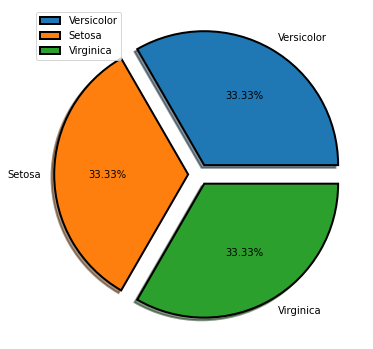

In [10]:
#Pie plot to show the overall types of Iris classifications
plt.figure(figsize=(6,7))
wedgeprops = {"linewidth": 2, 'width':1, "edgecolor":"k"}
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ex=[0.08,0.08,0.08]
plt.pie(s, labels = l,autopct='%1.2f%%',explode=ex,shadow=True,wedgeprops=wedgeprops)
plt.legend()
plt.show()

sepal_length       AxesSubplot(0.125,0.536818;0.133621x0.343182)
sepal_width     AxesSubplot(0.285345,0.536818;0.133621x0.343182)
petal_length     AxesSubplot(0.44569,0.536818;0.133621x0.343182)
petal_width     AxesSubplot(0.606034,0.536818;0.133621x0.343182)
dtype: object

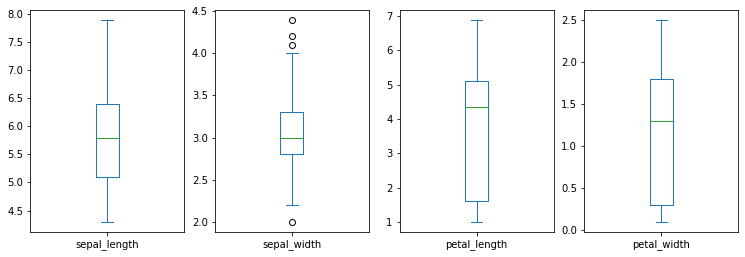

In [11]:
#checking for outliers by plotting boxplot
df.plot(kind ='box',subplots = True, layout =(2,5),figsize=(16,9),sharex = False)

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

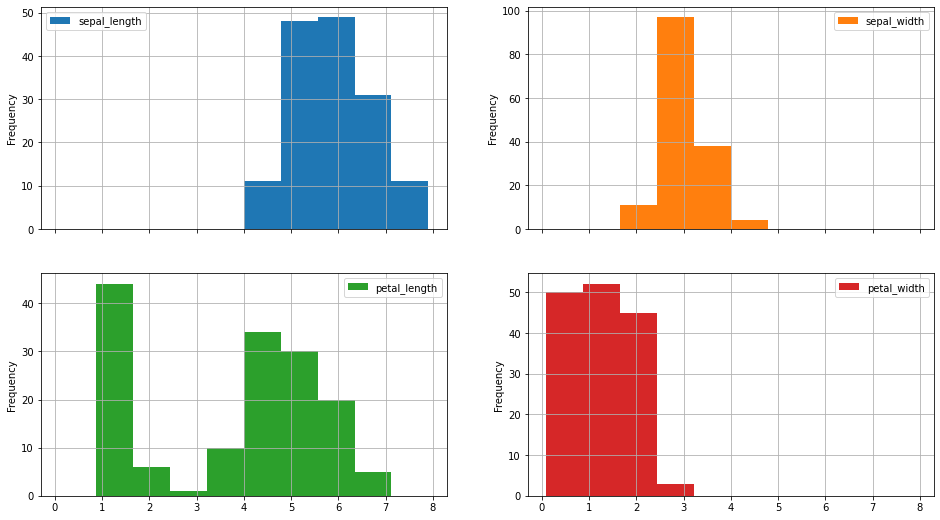

In [12]:
#getting view of data using histogram
df.plot(kind ='hist',subplots = True, layout =(2,2), figsize=(16,9),grid=True)

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

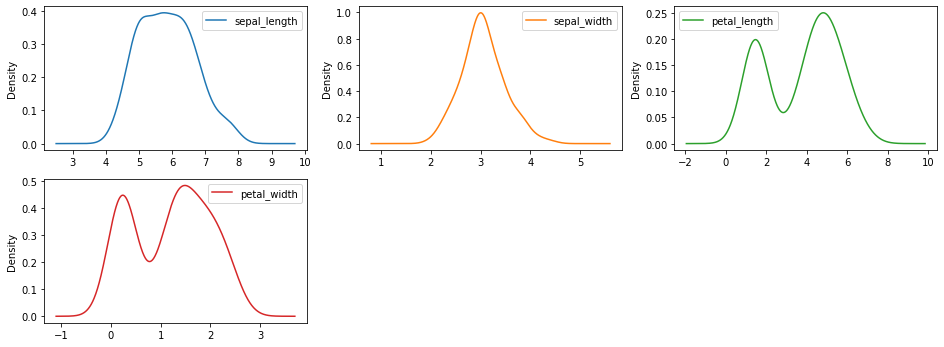

In [13]:
#density plot of dataset
df.plot(kind ='density',subplots = True, layout =(3,3),figsize=(16,9),sharex = False)

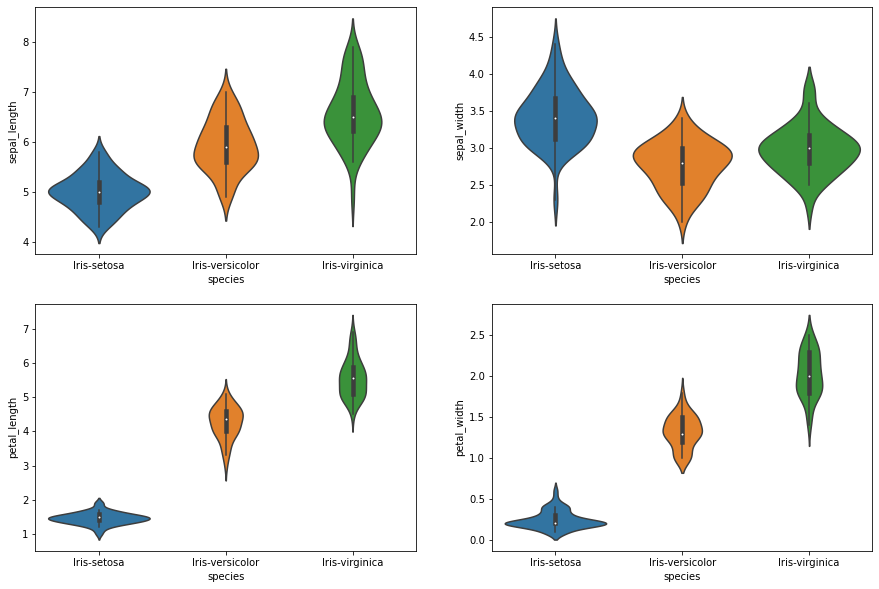

In [14]:
#visualization of various features of class species
plt.figure(figsize=(15,10))
column=['0','sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for i in range(1,5):
    plt.subplot(2,2,i)
    sns.violinplot(x='species',y=column[i],data=df)
    


In [15]:
#correlation matrix
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


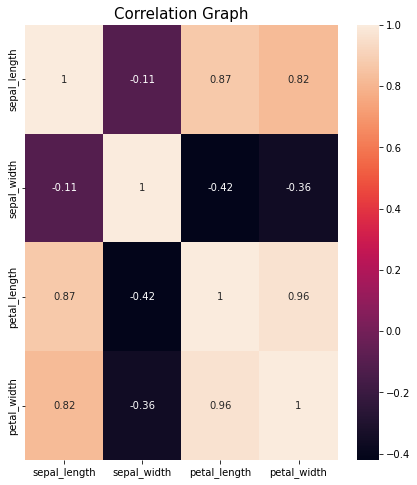

In [16]:
#correlation heatmap
plt.figure(figsize=(7,8))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation Graph",size=15)
plt.show()


The diagonal values are 1 as expected as they show relation of the feature with itself. Also, there is high positive correlation for Petal width with Sepal length and Petal length.
Also, correlation between Petal length and Sepal length is positively high.

#### Splitiing Datset into Dependent and Independent variable

In [17]:
X=df.drop(columns='species')
Y=df['species']
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


### TRAIN TEST SPLITTING

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [19]:
#Checking shape of splitted dataset
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


### SCALING THE DATASET

In [20]:
# Feature Scaling to bring all the variables in a single scale.

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
# Importing some metrics for evaluating  models.
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

### DECISION TREE CLASSIFIER

In [23]:
from sklearn.tree import DecisionTreeClassifier


#### Defining the decision tree classifier and fitting the training set

In [24]:
# model training
dec_tree=DecisionTreeClassifier()
dec_tree.fit(X_train, Y_train)


DecisionTreeClassifier()

#### Prediction on test data

In [25]:
dec_y_pred=dec_tree.predict(X_test)
dec_y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

#### Checking the accuracy of the model

In [26]:
accuracy_score(Y_test,dec_y_pred)*100

100.0

In [27]:
print(classification_report(Y_test,dec_y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [28]:
cm=confusion_matrix(Y_test,dec_y_pred )
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

<AxesSubplot:>

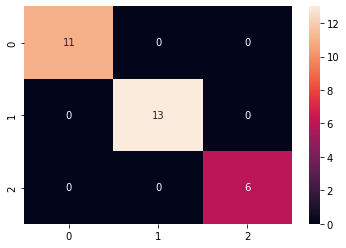

In [29]:
sns.heatmap(cm,annot=True)

### Visualizing the DECISION TREE

[Text(446.4, 498.3, 'petal width(cm) <= -0.557\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]\nclass = Iris-virginica'),
 Text(377.7230769230769, 407.70000000000005, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = Iris-setosa'),
 Text(515.0769230769231, 407.70000000000005, 'petal width(cm) <= 0.671\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]\nclass = Iris-virginica'),
 Text(274.7076923076923, 317.1, 'petal length(cm) <= 0.638\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]\nclass = Iris-versicolor'),
 Text(137.35384615384615, 226.5, 'petal width(cm) <= 0.542\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]\nclass = Iris-versicolor'),
 Text(68.67692307692307, 135.89999999999998, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = Iris-versicolor'),
 Text(206.03076923076924, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-virginica'),
 Text(412.0615384615385, 226.5, 'petal width(cm) <= 0.413\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]\nclas

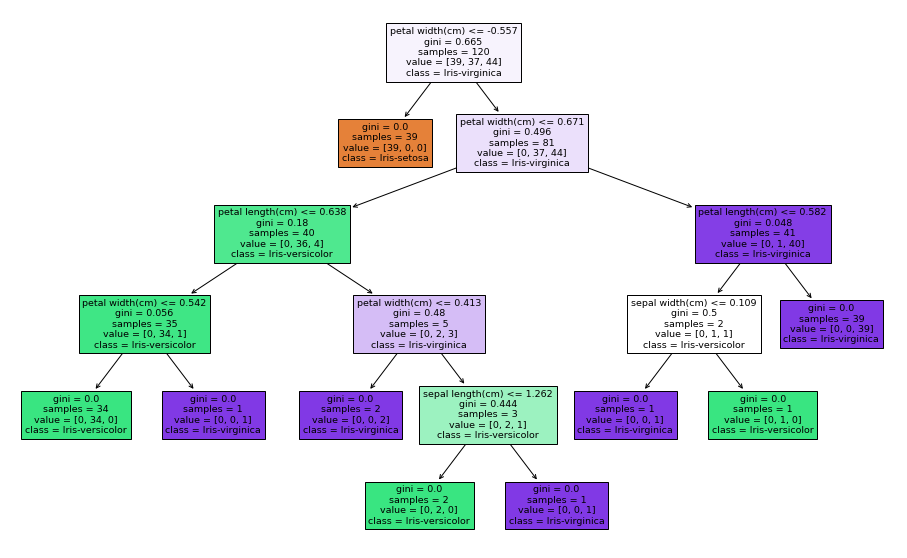

In [30]:
from sklearn import tree
feature_name =  ['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)']
class_name= df.species.unique()
plt.figure(figsize=(16,10))
tree.plot_tree(dec_tree, filled = True, feature_names = feature_name, class_names= class_name)

#### Predicting Output for Random Values

In [31]:
 dec_tree.predict([[5, 3.6, 1.4 , 0.2]])
#sepal length=5cm,
#sepal width=3.6cm,
#petal length=1.4cm,
#petal width=0.2cm


array(['Iris-virginica'], dtype=object)

In [32]:
dec_tree.predict([[4.1, 3.0, 5.1, 1.8]])
#sepal length=4.1cm,
#sepal width=3.0cm,
#petal length=5.1cm,
#petal width=1.8cm

array(['Iris-virginica'], dtype=object)